In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [3]:
for i in df.select_dtypes([float, int]).columns:
    if i == "DiabetesPedigreeFunction" and i == "Insulin" :
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        alt_sinir = Q1-(2.5*IQR)
        ust_sinir = Q3+(2.5*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
        aykiri_alt = df[i] < alt_sinir
        aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
        df[i][aykiri_alt] = alt_sinir
        df[i][aykiri_ust] = ust_sinir
        
        
    elif  i == "BloodPressure" and i == "BMI" and i == "Age" :
            Q1 = df[i].quantile(0.25)
            Q3 = df[i].quantile(0.75)
            IQR = Q3-Q1
            alt_sinir = Q1-(1.8*IQR)
            ust_sinir = Q3+(1.8*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
            aykiri_alt = df[i] < alt_sinir
            aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
            df[i][aykiri_alt] = alt_sinir
            df[i][aykiri_ust] = ust_sinir
    
    else : 
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        alt_sinir = Q1-(1.7*IQR)
        ust_sinir = Q3+(1.7*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
        aykiri_alt = df[i] < alt_sinir
        aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
        df[i][aykiri_alt] = alt_sinir
        df[i][aykiri_ust] = ust_sinir

In [4]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [5]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, accuracy_score

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[79 21]
 [25 29]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       100
           1       0.58      0.54      0.56        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.70      0.70      0.70       154


Train_Set
[[400   0]
 [  0 214]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [8]:
from sklearn.model_selection import cross_validate

model = DecisionTreeClassifier(random_state=42 )

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.563
test_recall      0.552
test_f1          0.552
test_accuracy    0.691
dtype: float64

max_depth= 5, splitter= "best", max_features = 8, 
                                  min_samples_leaf = 5
    ccp_alpha=

In [10]:
ccp_alpha = np.linspace(0,6)
ccp_alpha

array([0.        , 0.12244898, 0.24489796, 0.36734694, 0.48979592,
       0.6122449 , 0.73469388, 0.85714286, 0.97959184, 1.10204082,
       1.2244898 , 1.34693878, 1.46938776, 1.59183673, 1.71428571,
       1.83673469, 1.95918367, 2.08163265, 2.20408163, 2.32653061,
       2.44897959, 2.57142857, 2.69387755, 2.81632653, 2.93877551,
       3.06122449, 3.18367347, 3.30612245, 3.42857143, 3.55102041,
       3.67346939, 3.79591837, 3.91836735, 4.04081633, 4.16326531,
       4.28571429, 4.40816327, 4.53061224, 4.65306122, 4.7755102 ,
       4.89795918, 5.02040816, 5.14285714, 5.26530612, 5.3877551 ,
       5.51020408, 5.63265306, 5.75510204, 5.87755102, 6.        ])

In [12]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=42)

param_grid = {'ccp_alpha': ccp_alpha}

grid_model = GridSearchCV(model, param_grid, scoring= "recall" , cv=10)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': array([0.        , 0.12244898, 0.24489796, 0.36734694, 0.48979592,
       0.6122449 , 0.73469388, 0.85714286, 0.97959184, 1.10204082,
       1.2244898 , 1.34693878, 1.46938776, 1.59183673, 1.71428571,
       1.83673469, 1.95918367, 2.08163265, 2.20408163, 2.32653061,
       2.44897959, 2.57142857, 2.69387755, 2.81632653, 2.93877551,
       3.06122449, 3.18367347, 3.30612245, 3.42857143, 3.55102041,
       3.67346939, 3.79591837, 3.91836735, 4.04081633, 4.16326531,
       4.28571429, 4.40816327, 4.53061224, 4.65306122, 4.7755102 ,
       4.89795918, 5.02040816, 5.14285714, 5.26530612, 5.3877551 ,
       5.51020408, 5.63265306, 5.75510204, 5.87755102, 6.        ])},
             scoring='recall')

In [13]:
grid_model.best_params_

{'ccp_alpha': 0.0}

In [24]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0)

param_grid = {'max_depth': np.arange(2,30)}

grid_model = GridSearchCV(model, param_grid, scoring= "recall" , cv=10)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='recall')

In [25]:
grid_model.best_params_

{'max_depth': 15}

In [17]:
model = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0, max_depth=15)

param_grid = {'splitter': ["best", "random"]}

grid_model = GridSearchCV(model, param_grid, scoring= "recall" , cv=10)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=9, random_state=42),
             param_grid={'splitter': ['best', 'random']}, scoring='recall')

In [18]:
grid_model.best_params_

{'splitter': 'best'}

In [20]:
model = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0, max_depth=15, splitter = "best")

param_grid = {'min_samples_split': np.arange(2,100)}

grid_model = GridSearchCV(model, param_grid, scoring= "recall" , cv=10)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=9, random_state=42),
             param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='recall')

In [21]:
grid_model.best_params_

{'min_samples_split': 94}

In [26]:
model = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0, max_depth=15, splitter = "best", min_samples_split = 94)

param_grid = {'min_samples_leaf': np.arange(2,100)}

grid_model = GridSearchCV(model, param_grid, scoring= "recall" , cv=10)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=15,
                                              min_samples_split=94,
                                              random_state=42),
             param_grid={'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='recall')

In [27]:
grid_model.best_params_

{'min_samples_leaf': 26}

In [28]:
eval_metric(grid_model,X_train, y_train, X_test, y_test)

Test_Set
[[92  8]
 [28 26]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       100
           1       0.76      0.48      0.59        54

    accuracy                           0.77       154
   macro avg       0.77      0.70      0.71       154
weighted avg       0.77      0.77      0.75       154


Train_Set
[[372  28]
 [102 112]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       400
           1       0.80      0.52      0.63       214

    accuracy                           0.79       614
   macro avg       0.79      0.73      0.74       614
weighted avg       0.79      0.79      0.78       614



In [29]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, plot_roc_curve, plot_precision_recall_curve

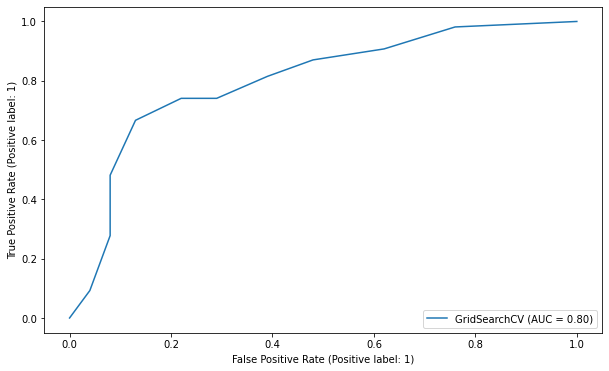

In [30]:
plot_roc_curve(grid_model, X_test, y_test, pos_label=1);

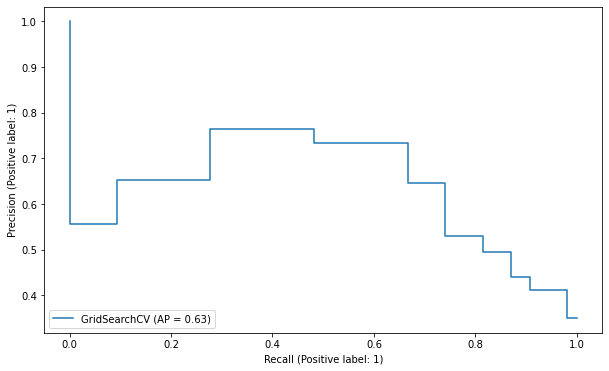

In [31]:
plot_precision_recall_curve(grid_model, X_test, y_test, pos_label=1);

In [38]:
y_pred_proba = dt_model.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate) 

optimal_threshold = thresholds[optimal_idx] # en iyi threshold değerimizin olduğu indexi arraye vererek buluruz.
optimal_threshold

1.0

In [44]:
y_pred = pd.Series(grid_model.predict_proba(X_test)[:,1]).apply(lambda x : 1 if x >= 0.2 else 0)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[61 39]
 [10 44]]
              precision    recall  f1-score   support

           0       0.86      0.61      0.71       100
           1       0.53      0.81      0.64        54

    accuracy                           0.68       154
   macro avg       0.69      0.71      0.68       154
weighted avg       0.74      0.68      0.69       154



In [43]:
y_pred1 = pd.Series(grid_model.predict_proba(X_train)[:,1]).apply(lambda x : 1 if x >= 0.2 else 0)

print(confusion_matrix(y_train, y_pred1))
print(classification_report(y_train, y_pred1))

[[244 156]
 [ 19 195]]
              precision    recall  f1-score   support

           0       0.93      0.61      0.74       400
           1       0.56      0.91      0.69       214

    accuracy                           0.71       614
   macro avg       0.74      0.76      0.71       614
weighted avg       0.80      0.71      0.72       614



In [45]:
from sklearn.model_selection import StratifiedKFold

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    # for ile manuel olarak cross validation train ve test verilerini seçiyoruz.
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    # aldığımız her skoru yukarıda tanımlanan boş listeye atıyoruz. 
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%') 
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [54]:
model = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0, max_depth=15, splitter = "best", min_samples_split = 94,
                              min_samples_leaf= 26, class_weight="balanced")
model.fit(X,y)

DecisionTreeClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=26, min_samples_split=94,
                       random_state=42)

In [55]:
prediction = pd.Series(model.predict_proba(X)[:,1]).apply(lambda x : 1 if x >= 0.2 else 0)
print(confusion_matrix(y, prediction))
print(classification_report(y, prediction))

[[250 250]
 [ 12 256]]
              precision    recall  f1-score   support

           0       0.95      0.50      0.66       500
           1       0.51      0.96      0.66       268

    accuracy                           0.66       768
   macro avg       0.73      0.73      0.66       768
weighted avg       0.80      0.66      0.66       768



In [56]:
CV(10, model, pd.DataFrame(X), y, 0.2)

Accuracy      59.23%  std 7.19%
Precision-1   46.50%  std 5.15%
Recall-1      93.29%  std 6.19%
F1_score-1    61.75%  std 3.99%


In [53]:
dt_feature_imp = pd.DataFrame(index = X.columns, data = model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
dt_feature_imp

,Feature Importance
Glucose,0.569
BMI,0.240
Age,0.147
DiabetesPedigreeFunction,0.034
Insulin,0.011
Pregnancies,0.000
BloodPressure,0.000
SkinThickness,0.000
